In [1]:
%matplotlib inline
import pandas as pd
import json
from bhtsne import tsne
import matplotlib.pyplot as plt

file = 'filtered_otomoto.json'
with open(file) as datafile:
    dataset = json.load(datafile)
    
KEYS = ['mileage', 'price', 'production_year']
dataframe = pd.DataFrame.from_dict(dataset)
dataframe = dataframe.filter(KEYS)
dataframe = dataframe.dropna()
dataframe[['mileage', 'production_year']] = dataframe[['mileage', 'production_year']].astype(float)

tsne_results = tsne(dimensions=2, perplexity=40, data=dataframe)


In [198]:
file = 'filtered_otomoto.json'
with open(file) as datafile:
    orig_dataset = pd.DataFrame.from_dict(json.load(datafile))

LABELS = ['mileage', 'price', 'production_year', 'brand', 'fuel_type', 'power']
orig_dataset.fuel_type = orig_dataset.fuel_type.fillna('no data')
orig_dataset.power = orig_dataset.power.fillna(0)
orig_dataset = orig_dataset.filter(LABELS).dropna()
print(len(orig_dataset))
print(len(tsne_results))
print(orig_dataset)

124956
124956
         mileage   price  production_year          brand    fuel_type  power
0         9000.0   64500           2017.0         Suzuki      Benzyna  120.0
1       256000.0   29000           2008.0          Škoda       Diesel  170.0
2       260000.0   18800           2006.0     Volkswagen       Diesel  140.0
3       174335.0   85900           2012.0  Mercedes-Benz       Diesel  210.0
4        39000.0  126000           2013.0     Mitsubishi       Diesel  245.0
5        50000.0   69000           2016.0         Toyota       Diesel    0.0
6        65000.0   37900           2015.0           Opel       Diesel   90.0
7        65000.0  164900           2013.0           Audi       Diesel  313.0
8        98000.0  254900           2014.0            BMW       Diesel  381.0
9       241000.0   28900           2011.0  Mercedes-Benz       Diesel  110.0
10       85400.0   49990           2016.0        Peugeot       Diesel  120.0
11      137922.0   42500           2014.0     Volkswagen      

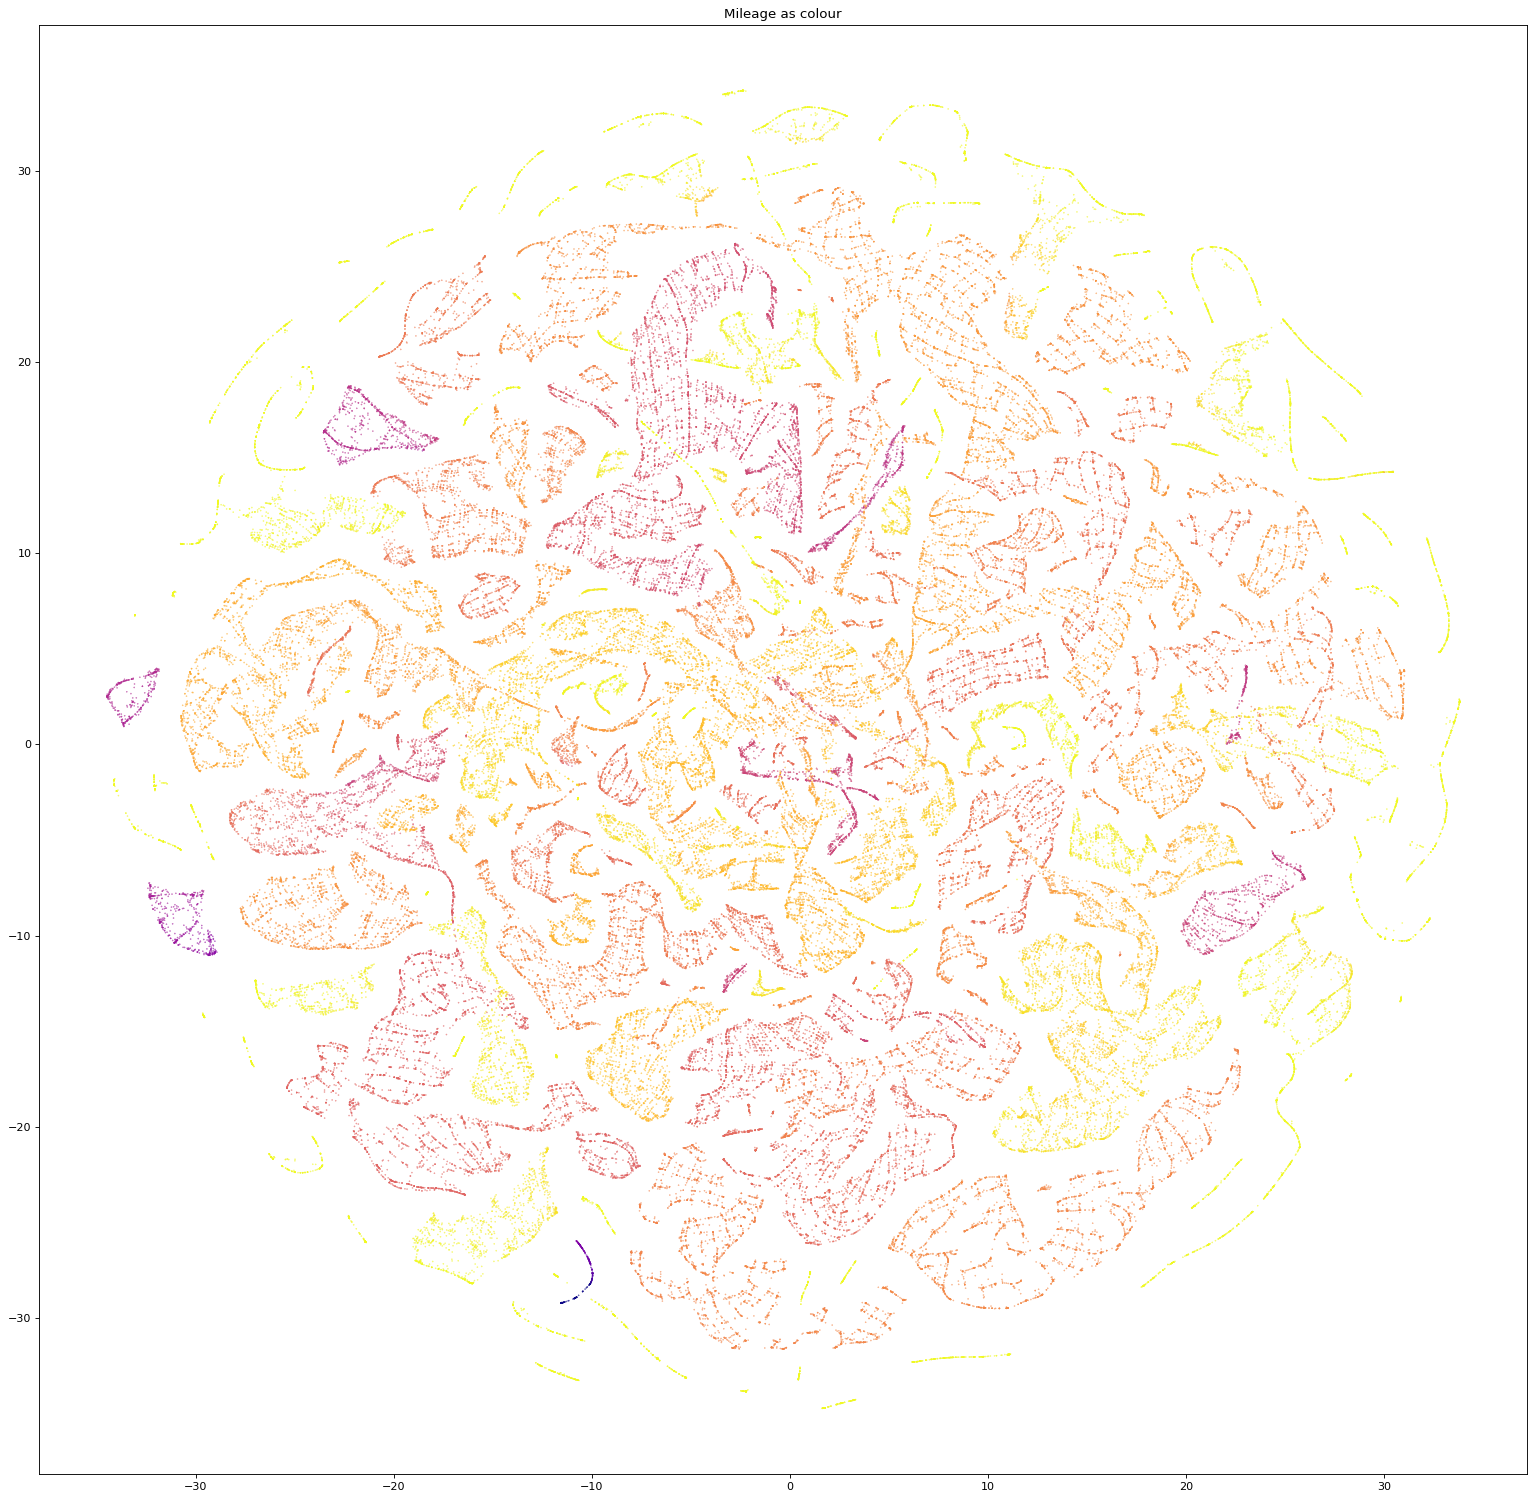

In [50]:
fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(
    x=tsne_results[:,0], y=tsne_results[:,1], c=orig_dataset['mileage'].tolist(), 
    s=0.1, cmap=plt.cm.plasma_r, vmin=0, vmax=600000
)
ax.set_title("Mileage as colour")
plt.show()




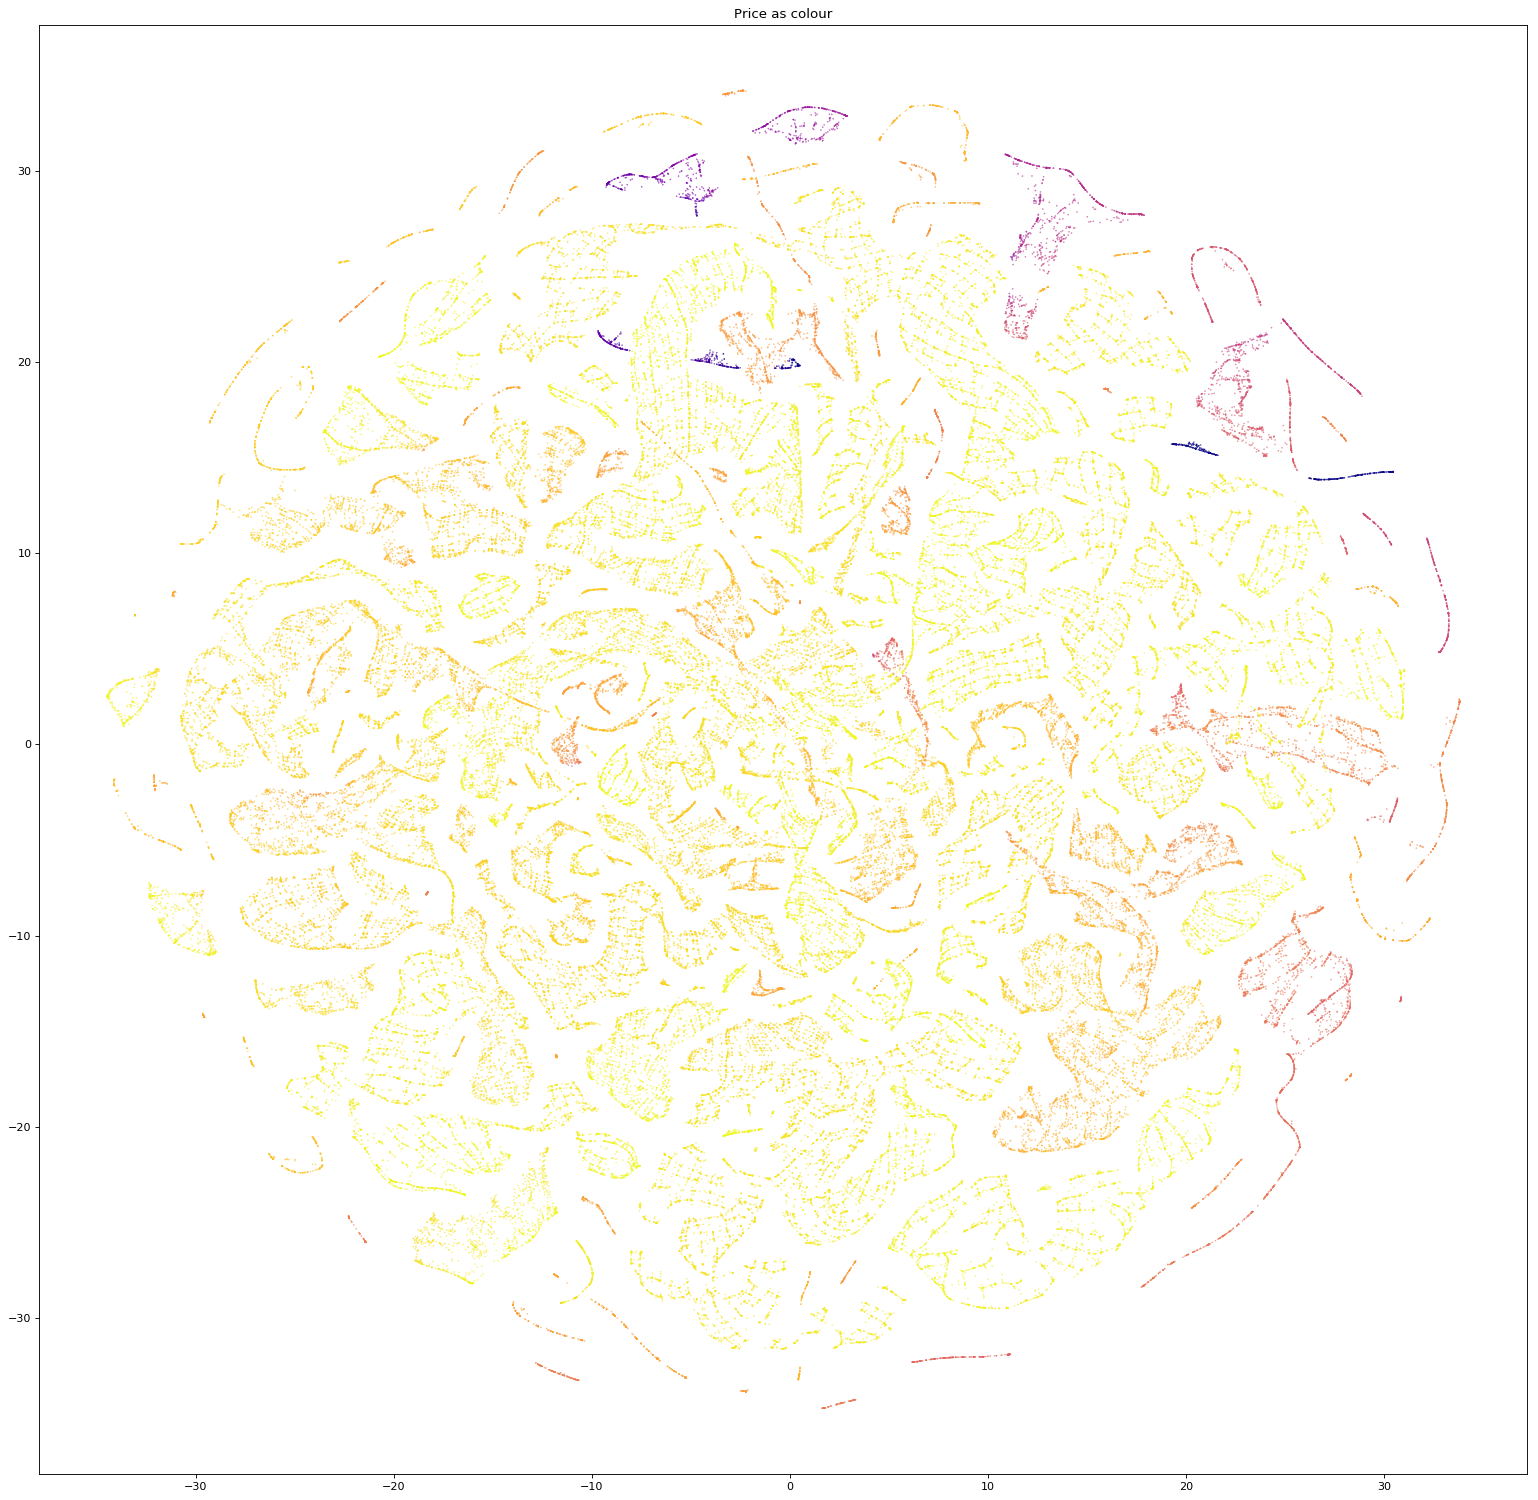

In [60]:
fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(
    x=tsne_results[:,0], y=tsne_results[:,1], c=orig_dataset['price'].tolist(), 
    s=0.1, cmap=plt.cm.plasma_r, vmin=0, vmax=500000
)
ax.set_title("Price as colour")
plt.show()



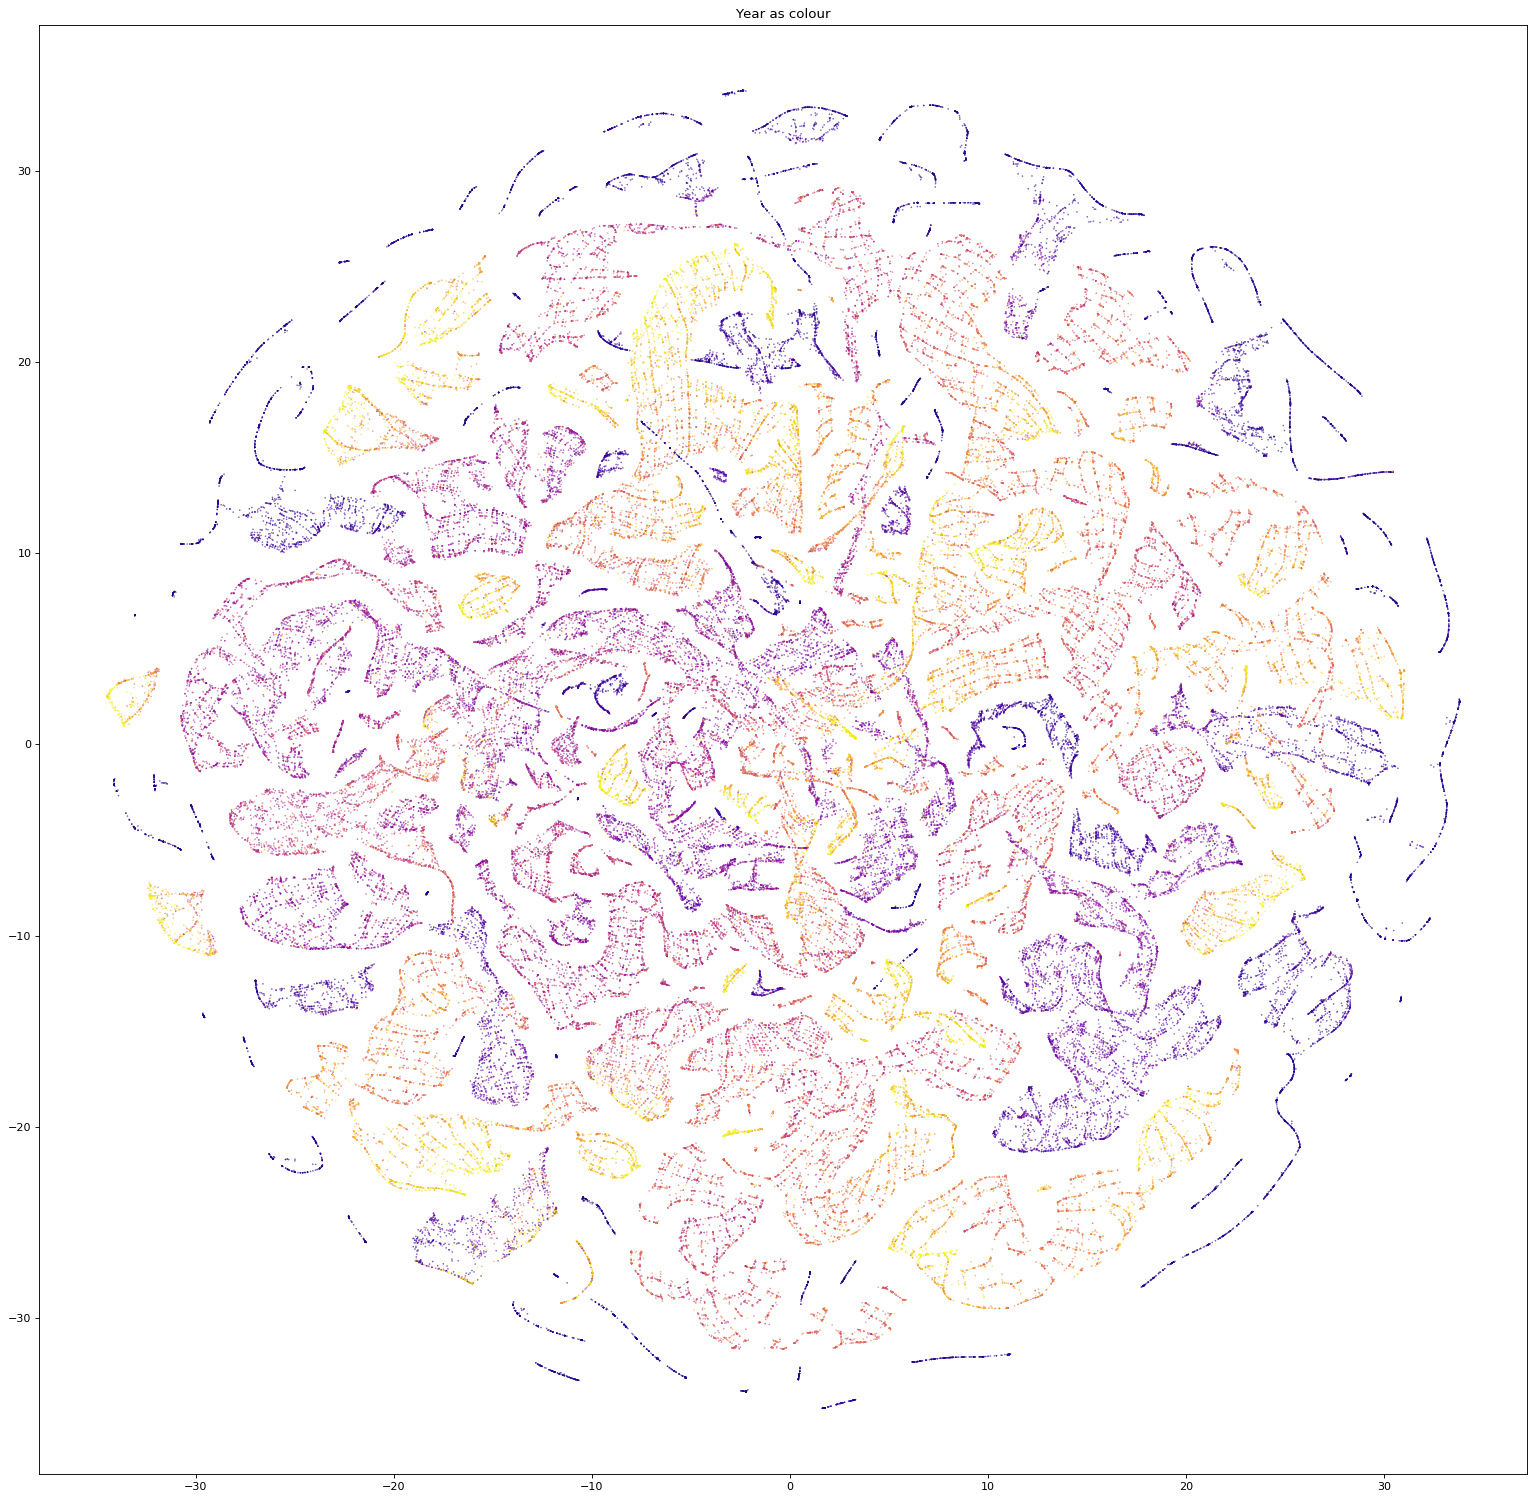

In [59]:
fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(
    x=tsne_results[:,0], y=tsne_results[:,1], c=orig_dataset['production_year'].tolist(), 
    s=0.1, cmap=plt.cm.plasma_r, vmin=2000, vmax=2018
)
ax.set_title("Year as colour")
plt.show()



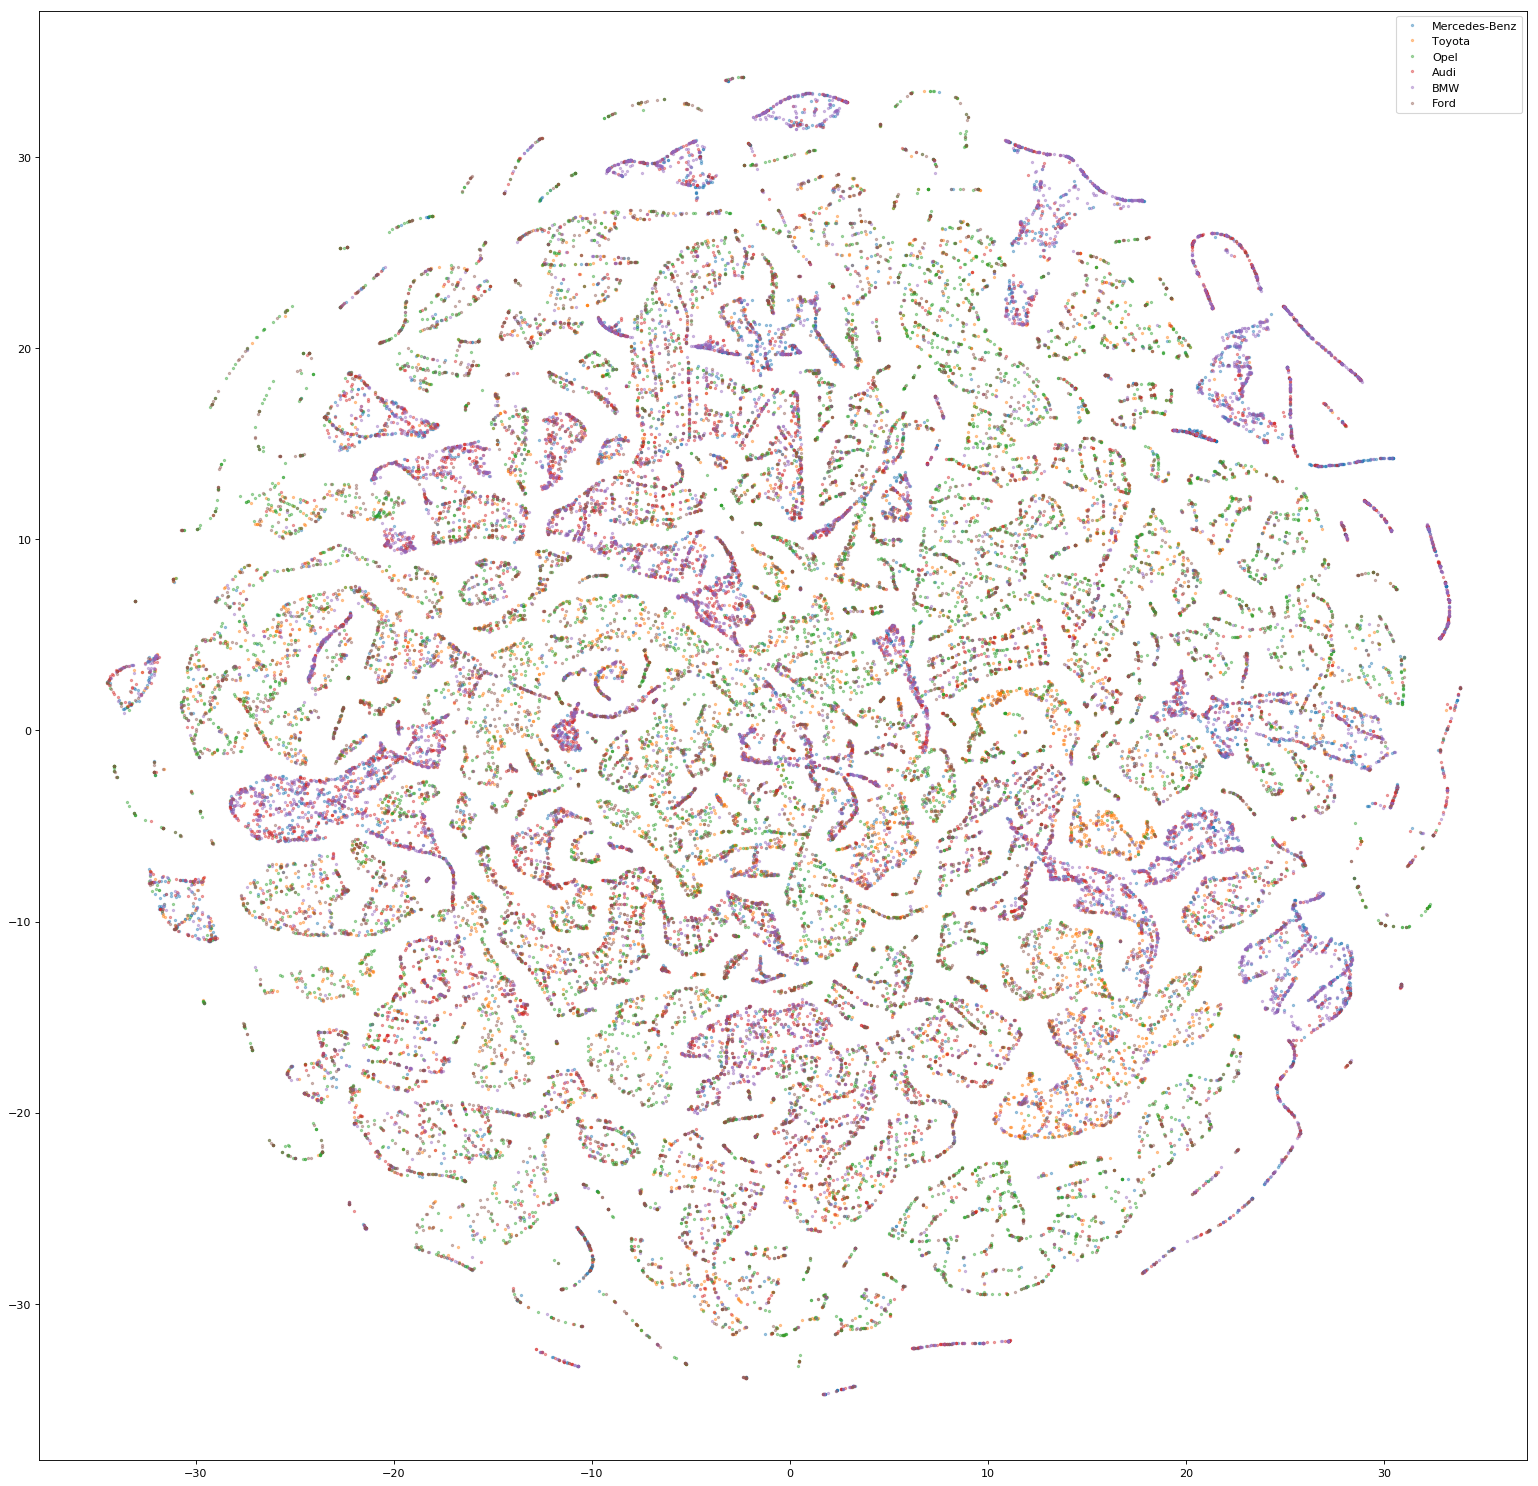

In [174]:
from pandas.api.types import CategoricalDtype
import seaborn as sns

POPULAR_BRANDS=['Audi', 'Ford', 'Opel', 'Toyota', 'BMW', 'Mercedes-Benz']

# brand_categories = orig_dataset['brand'].unique().tolist()
# brand_type = CategoricalDtype(categories=brand_categories, ordered=False)

# orig_dataset['brand'] = orig_dataset['brand'].astype(brand_type)

plot_dataframe = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], brand=orig_dataset['brand']))
plot_dataframe = plot_dataframe.loc[plot_dataframe.brand.isin(POPULAR_BRANDS)]

groups = plot_dataframe.groupby('brand')


fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

for name, group in groups:
    if name in POPULAR_BRANDS:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name, alpha=0.4)
ax.legend()
plt.show()

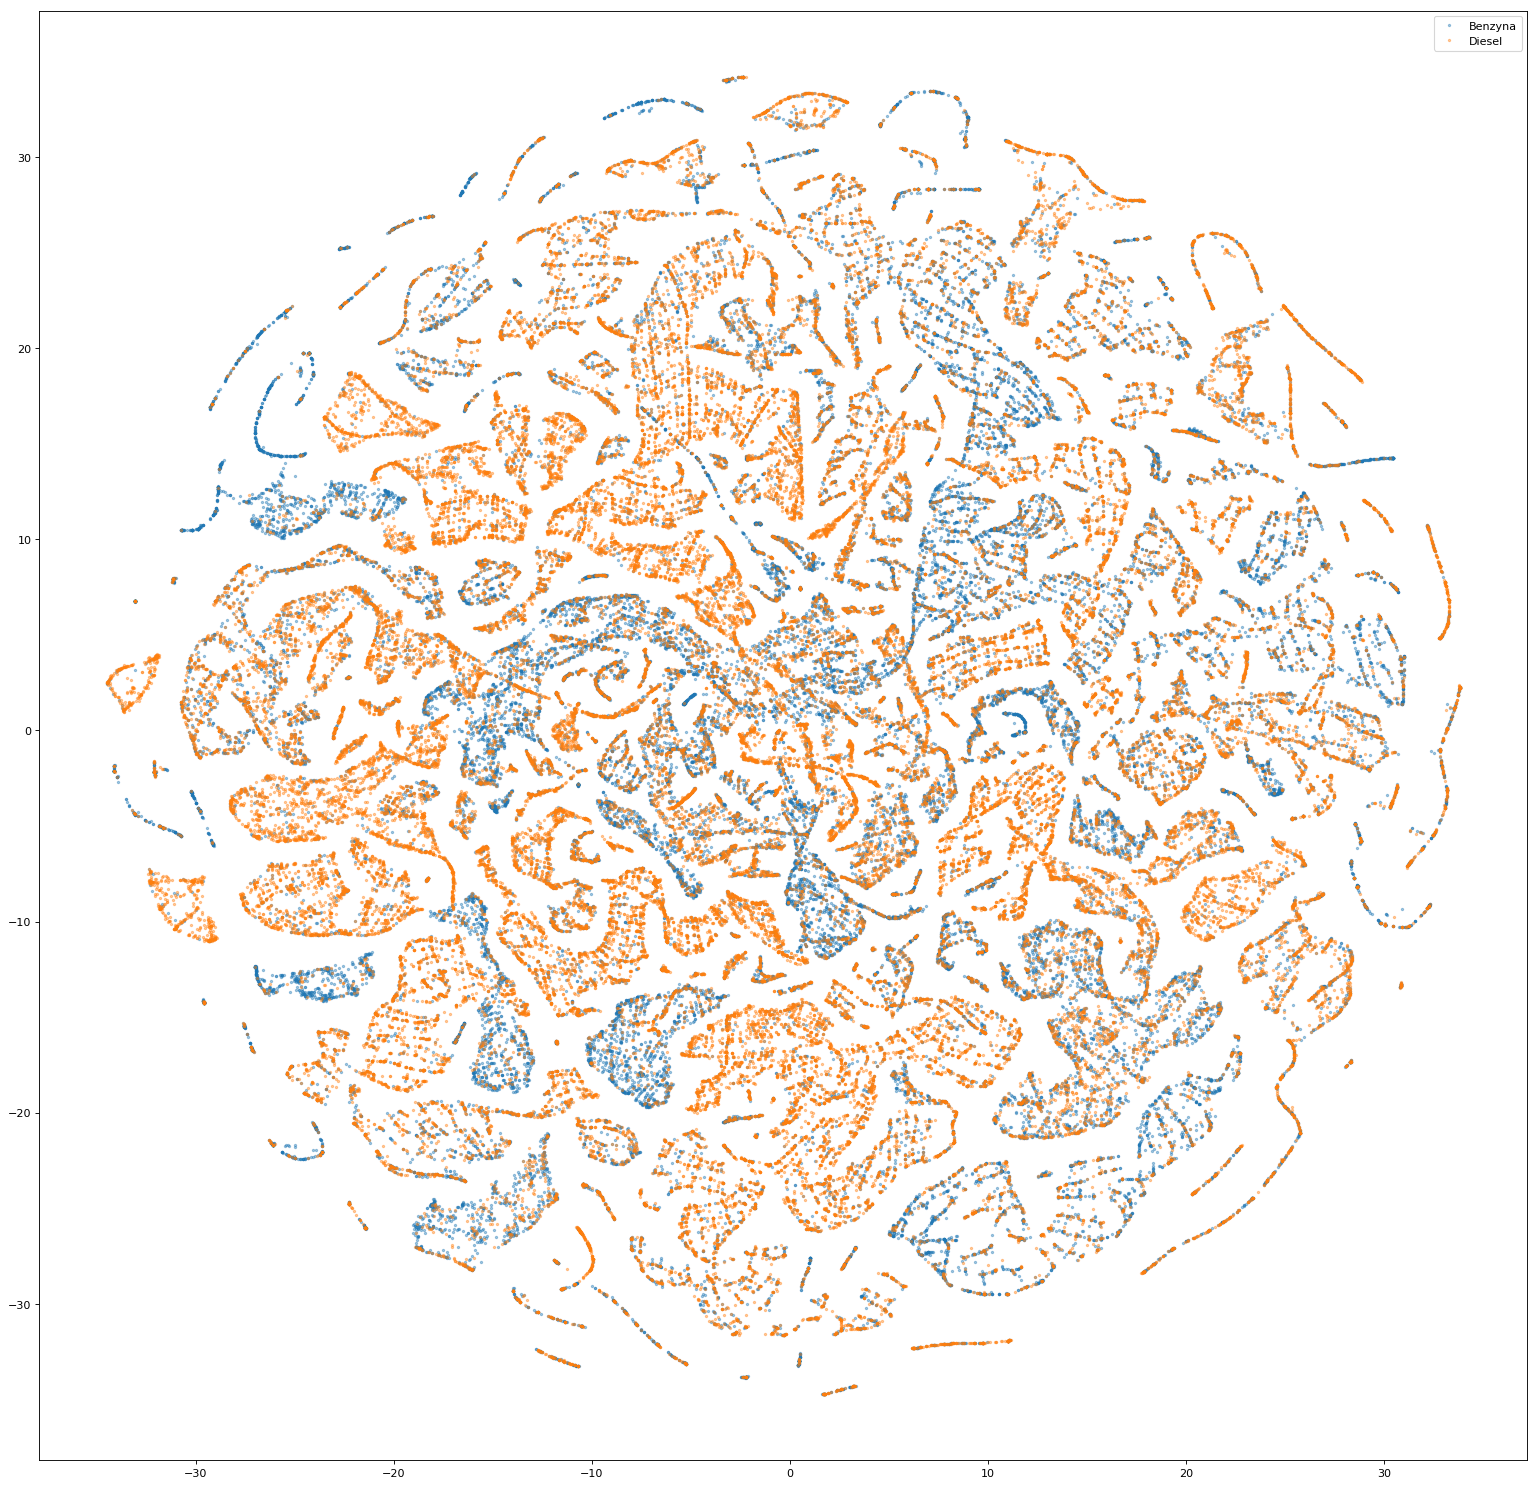

In [196]:
FUEL_TYPES=['Benzyna', 'Diesel']

plot_dataframe = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], fuel_type=orig_dataset['fuel_type']))
plot_dataframe = plot_dataframe.loc[plot_dataframe.fuel_type.isin(FUEL_TYPES)]

groups = plot_dataframe.groupby('fuel_type')

fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

for name, group in groups:
    if name in FUEL_TYPES:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name, alpha=0.4)
ax.legend()
plt.show()

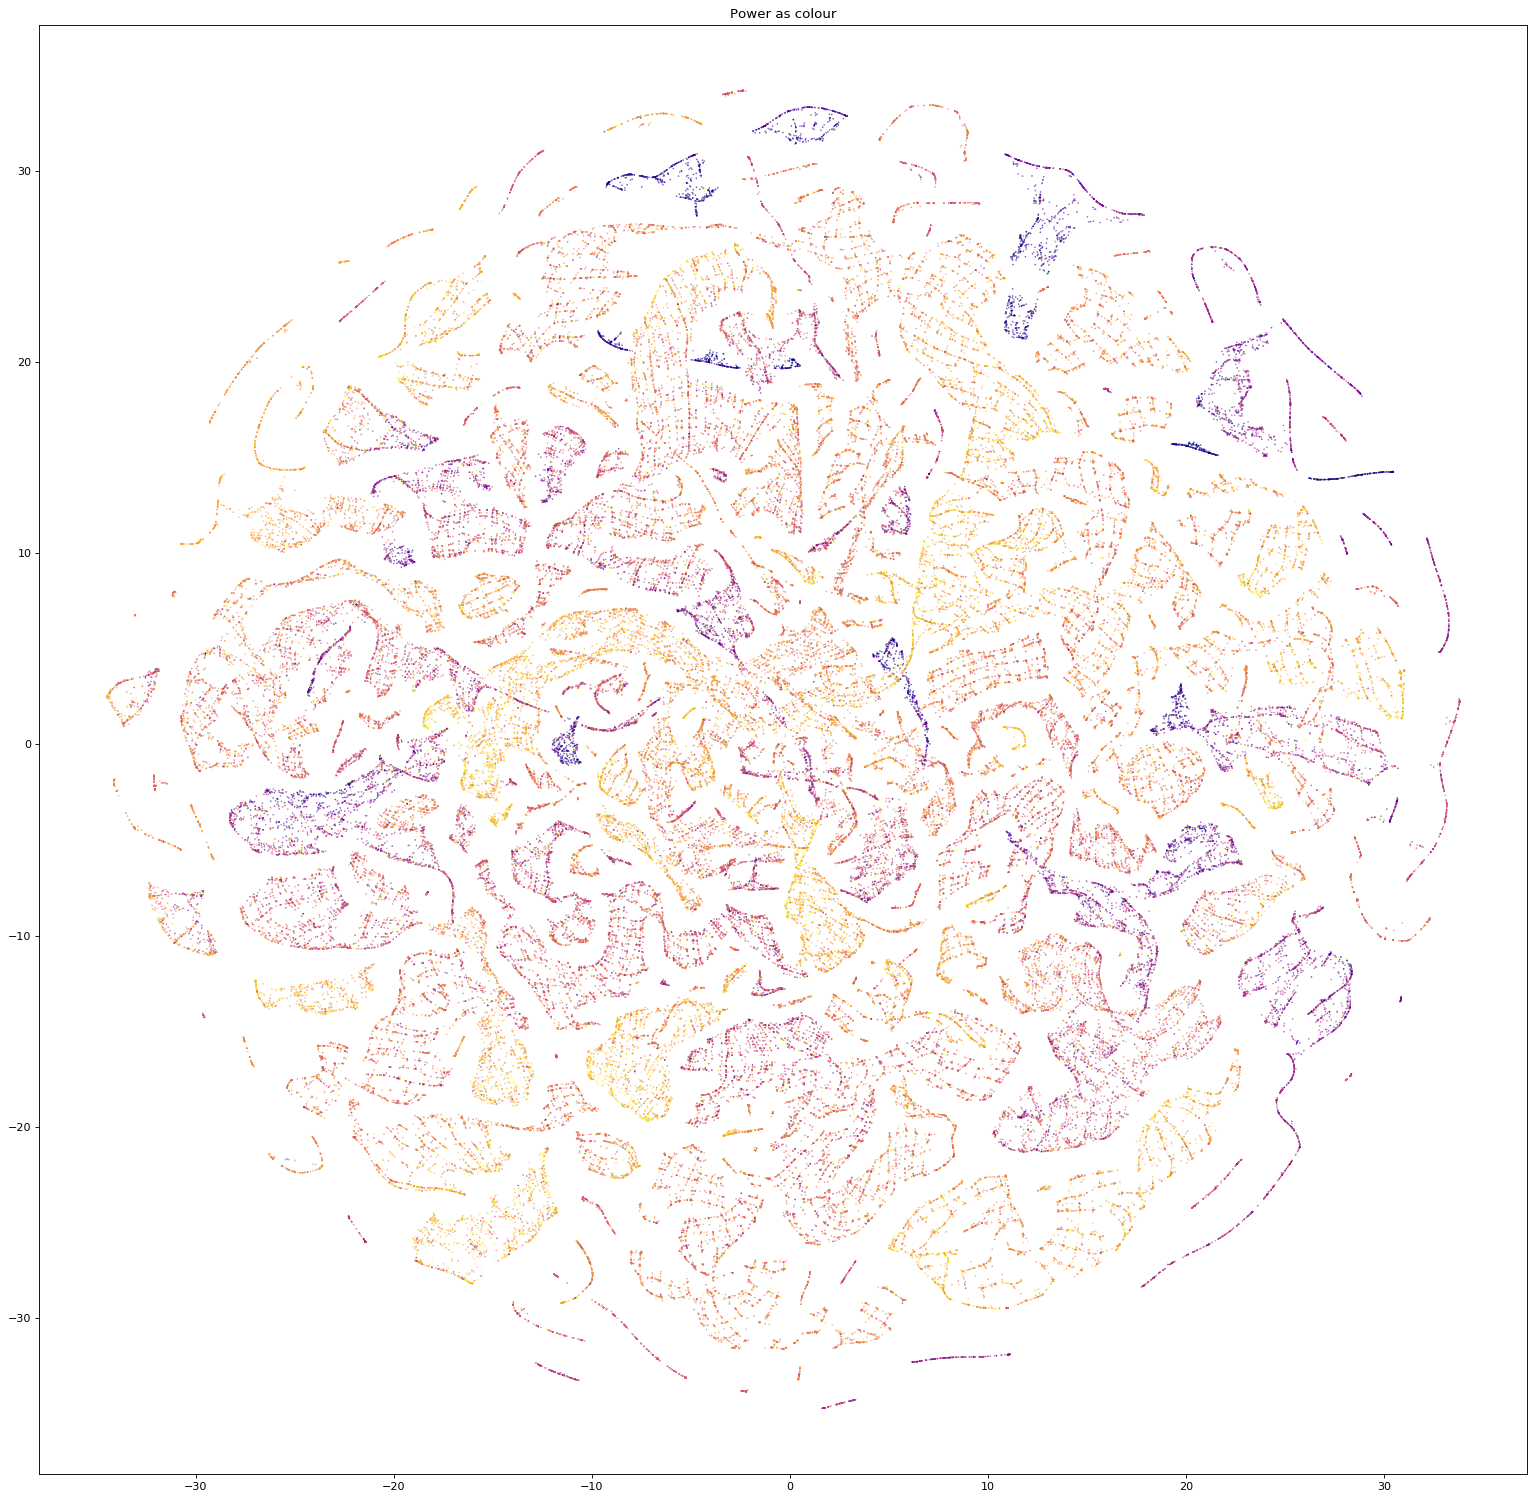

In [200]:
fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(
    x=tsne_results[:,0], y=tsne_results[:,1], c=orig_dataset['power'].tolist(), 
    s=0.1, cmap=plt.cm.plasma_r, vmin=30, vmax=300
)
ax.set_title("Power as colour")
plt.show()
